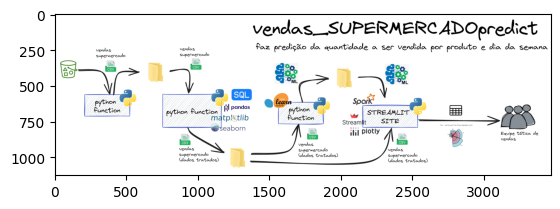

In [462]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('escopo_vendas_SUPERMERCADOpredict.png'))

## Faz a limpeza e tratamento dos dados de vendas de supermercado

- Arquivo de vendas de supermercado
https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
- Arquivo de feriados do país onde as vendas foram feitas
https://feriados.net/country/Myanmar-Yangon_762.htm

O crescimento dos supermercados nas cidades mais populosas está a aumentar e a concorrência no mercado também é elevada. O conjunto de dados é um dos históricos de vendas de uma empresa supermercadista que registrou dados em 3 filiais diferentes durante 3 meses. Os métodos preditivos de análise de dados são fáceis de aplicar com este conjunto de dados.

- ID da fatura: Número de identificação da fatura do comprovante de vendas gerado por computador
- Filial: Filial do supercentro (3 filiais estão disponíveis identificadas por A, B e C).
- Cidade: Localização dos supercentros
- Tipo de cliente: Tipo de cliente, cadastrado por Integrante para clientes com cartão de associado e Normal para sem cartão de associado.
- Gênero: Gênero tipo de cliente
- Linha de produtos: Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens
- Preço unitário: Preço de cada produto em $
- Quantidade: Número de produtos adquiridos por cliente
- Imposto: taxa de imposto de 5% para compra do cliente
- Total: Preço total incluindo impostos
- Data: Data da compra (registro disponível de janeiro de 2019 a março de 2019)
- Horário: Horário da compra (10h às 21h)
- Pagamento: Pagamento utilizado pelo cliente para compra ( 3 métodos estão disponíveis - dinheiro, cartão de crédito e carteira eletrônica)
- CPV: Custo dos produtos vendidos
- Porcentagem da margem bruta: Porcentagem da margem bruta
- Receita bruta: Classificação da receita bruta
- Experiencia_cliente: pontuação relativo à experiência do cliente

In [463]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [464]:
# le os dados do dataset recebendo em formato de dataframe
dfx = pd.read_csv('arquivos/supermarket_sales.csv')

In [465]:
# verifica quantas linhas e colunas o dataframe possui
dfx.shape

(1000, 17)

In [466]:
# reconhece os nomes das colunas existentes e verifica se existe algum nulo.
# não tem nulos já que Non-Null = Qtde de Linhas.
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [467]:
# Faz um reconhecimento das colunas e dos dados
dfx.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [468]:
# traduz o nome das colunas para facilitar o entendimento
dfx.columns = ['id_fatura', 'filial', 'cidade', 'tipo_cliente', 'genero', 'linha_produto', 'preco_unitario', \
               'qtde', 'imposto', 'total_preco', 'data', 'hora', 'moeda', 'custo', 'margem_bruta', \
                'receita_bruta', 'experiencia_cliente']

In [469]:
# junta data e hora em uma mesma coluna
dfx['data_hora'] = dfx['data'] + ' ' + dfx['hora']

In [470]:
# transforma data_hora para o formato datetime
dfx['data_hora'] = pd.to_datetime(dfx['data_hora'])

In [471]:
# apaga a coluna de data
dfx = dfx.drop("data", axis=1)

In [472]:
# apaga a coluna de hora
dfx = dfx.drop('hora', axis=1)

In [473]:
# cria a coluna de dia da semana
dfx['dia_semana'] = dfx['data_hora'].dt.weekday

In [474]:
# cria a coluna diaMes para marcar feriado
dfx['diaMes'] = dfx['data_hora'].dt.strftime("%d%m")

In [475]:
# cria dataframe de feriados em Mianmar conforme figura feriados_mianmar.png
df_feriados = pd.DataFrame()
df_feriados['diaMes'] = ' '
df_feriados = pd.DataFrame(np.array([
                            ['0105'], 
                            ['2205'],
                            ['1907'],
                            ['2007'],
                            ['2107'],
                            ['2207'],
                            ['1610'],
                            ['1710'],
                            ['1810'],
                            ['1411'],
                            ['1511'],
                            ['2511']
                            ]))

df_feriados.columns = ['diaMes']
print(df_feriados)

   diaMes
0    0105
1    2205
2    1907
3    2007
4    2107
5    2207
6    1610
7    1710
8    1810
9    1411
10   1511
11   2511


In [476]:
# cria coluna de feriado para indicar se a data foi feriado ou não
dfx['feriado'] = 0

In [477]:
# move 1 para o campo feriado quando a data existir no dataframe de feriados
dfx['feriado'][dfx.diaMes.isin(df_feriados.diaMes)] = 1

In [478]:
# cria coluna numerica integer somente com o valor da hora
dfx['hora'] = dfx['data_hora'].dt.hour

In [479]:
# apaga a coluna de diaMes
dfx = dfx.drop("diaMes", axis=1)

In [480]:
# verifica as novas colunas criadas
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_fatura            1000 non-null   object        
 1   filial               1000 non-null   object        
 2   cidade               1000 non-null   object        
 3   tipo_cliente         1000 non-null   object        
 4   genero               1000 non-null   object        
 5   linha_produto        1000 non-null   object        
 6   preco_unitario       1000 non-null   float64       
 7   qtde                 1000 non-null   int64         
 8   imposto              1000 non-null   float64       
 9   total_preco          1000 non-null   float64       
 10  moeda                1000 non-null   object        
 11  custo                1000 non-null   float64       
 12  margem_bruta         1000 non-null   float64       
 13  receita_bruta        1000 non-null

In [481]:
# verifica os dados das novas colunas criadas
dfx.head(3)

,id_fatura,filial,cidade,tipo_cliente,genero,linha_produto,preco_unitario,qtde,imposto,total_preco,moeda,custo,margem_bruta,receita_bruta,experiencia_cliente,data_hora,dia_semana,feriado,hora
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,5,0,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,4,0,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,6,0,13


In [482]:
# verifica se os dados de cada coluna estão com as quantidades balanceadas
# estão balanceados!
display('ano', dfx.data_hora.dt.year.value_counts())
display('mes', dfx.data_hora.dt.month.value_counts())
display('dia semana', dfx.data_hora.dt.weekday.value_counts())
display('hora', dfx.hora.value_counts())

display('moeda', dfx.moeda.value_counts())
display('linha produto', dfx.linha_produto.value_counts())

display('filial', dfx.filial.value_counts())
display('cidade', dfx.cidade.value_counts())
display('tipo cliente', dfx.tipo_cliente.value_counts())
display('genero', dfx.genero.value_counts())

'ano'

data_hora
2019    1000
Name: count, dtype: int64

'mes'

data_hora
1    352
3    345
2    303
Name: count, dtype: int64

'dia semana'

data_hora
5    164
1    158
2    143
4    139
3    138
6    133
0    125
Name: count, dtype: int64

'hora'

hora
19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: count, dtype: int64

'moeda'

moeda
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

'linha produto'

linha_produto
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

'filial'

filial
A    340
B    332
C    328
Name: count, dtype: int64

'cidade'

cidade
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

'tipo cliente'

tipo_cliente
Member    501
Normal    499
Name: count, dtype: int64

'genero'

genero
Female    501
Male      499
Name: count, dtype: int64

In [483]:
# converte categorias string em colunas de categorias com valores 0 e 1
ohe = OneHotEncoder()
ohe = ohe.fit(dfx[['filial', 'tipo_cliente', 'genero', 'linha_produto', 'moeda']])
ohe_df = pd.DataFrame(ohe.transform(dfx[['filial', 'tipo_cliente', 'genero', 'linha_produto', 'moeda']]).toarray())

In [484]:
# coloca o cabeçalho original no dataframe
ohe_df.columns = ohe.get_feature_names_out()

In [485]:
# visualiza cabeçalho e primeiras linhas
ohe_df.head(3)

,filial_A,filial_B,filial_C,tipo_cliente_Member,tipo_cliente_Normal,genero_Female,genero_Male,linha_produto_Electronic accessories,linha_produto_Fashion accessories,linha_produto_Food and beverages,linha_produto_Health and beauty,linha_produto_Home and lifestyle,linha_produto_Sports and travel,moeda_Cash,moeda_Credit card,moeda_Ewallet
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [486]:
# exibe as colunas, verifica o total
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   filial_A                              1000 non-null   float64
 1   filial_B                              1000 non-null   float64
 2   filial_C                              1000 non-null   float64
 3   tipo_cliente_Member                   1000 non-null   float64
 4   tipo_cliente_Normal                   1000 non-null   float64
 5   genero_Female                         1000 non-null   float64
 6   genero_Male                           1000 non-null   float64
 7   linha_produto_Electronic accessories  1000 non-null   float64
 8   linha_produto_Fashion accessories     1000 non-null   float64
 9   linha_produto_Food and beverages      1000 non-null   float64
 10  linha_produto_Health and beauty       1000 non-null   float64
 11  linha_produto_Home

In [487]:
# verifica o tipo de variáveis do dfx_dumm
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_fatura            1000 non-null   object        
 1   filial               1000 non-null   object        
 2   cidade               1000 non-null   object        
 3   tipo_cliente         1000 non-null   object        
 4   genero               1000 non-null   object        
 5   linha_produto        1000 non-null   object        
 6   preco_unitario       1000 non-null   float64       
 7   qtde                 1000 non-null   int64         
 8   imposto              1000 non-null   float64       
 9   total_preco          1000 non-null   float64       
 10  moeda                1000 non-null   object        
 11  custo                1000 non-null   float64       
 12  margem_bruta         1000 non-null   float64       
 13  receita_bruta        1000 non-null

In [488]:
# junta dfx original com valores numericos 0-1
dfx = pd.concat([dfx, ohe_df], axis=1)   

In [489]:
# verifica as novas colunas criadas transformadas de categórica para numérica
dfx.head(3)

,id_fatura,filial,cidade,tipo_cliente,genero,linha_produto,preco_unitario,qtde,imposto,total_preco,moeda,custo,margem_bruta,receita_bruta,experiencia_cliente,data_hora,dia_semana,feriado,hora,filial_A,filial_B,filial_C,tipo_cliente_Member,tipo_cliente_Normal,genero_Female,genero_Male,linha_produto_Electronic accessories,linha_produto_Fashion accessories,linha_produto_Food and beverages,linha_produto_Health and beauty,linha_produto_Home and lifestyle,linha_produto_Sports and travel,moeda_Cash,moeda_Credit card,moeda_Ewallet
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,5,0,13,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,4,0,10,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,6,0,13,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


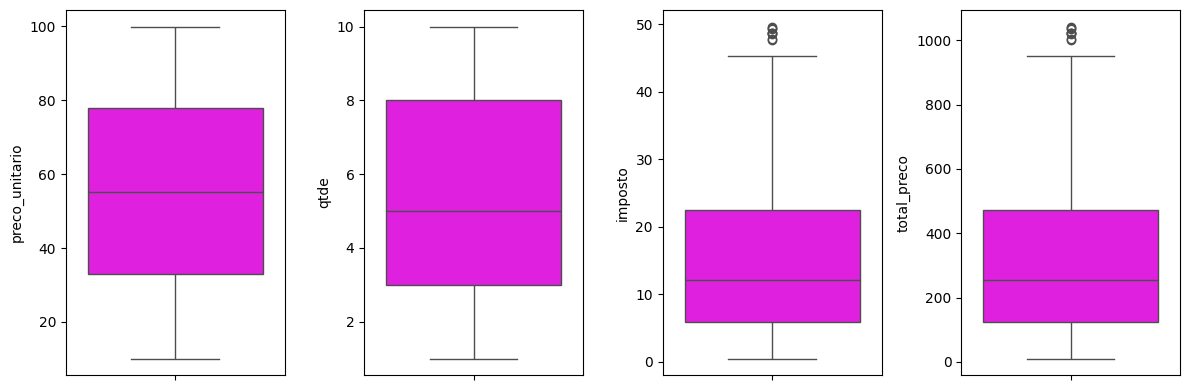

In [490]:
# visualizando boxplot para ver a distribuição nos quartis e os outliers
search_outliers = ["preco_unitario", "qtde", "imposto", 'total_preco']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=dfx, ax=axs[i], color='magenta')

plt.show()

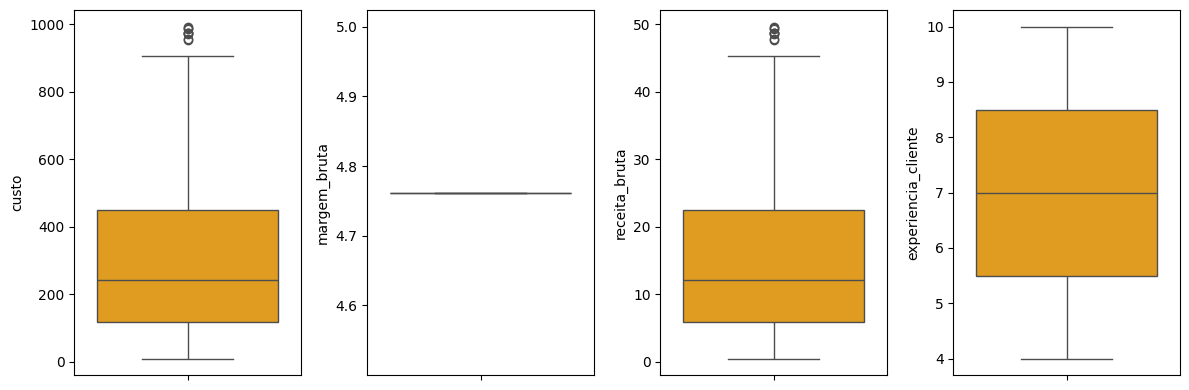

In [491]:
# visualizando boxplot para ver a distribuição nos quartis e os outliers
search_outliers = ["custo", "margem_bruta", 'receita_bruta', 'experiencia_cliente']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=dfx, ax=axs[i], color='orange')

plt.show()

In [492]:
# verifica se os outliers são discrepantes do restante
dfx_outliers = dfx[['imposto', 'total_preco', 'custo', 'receita_bruta']]
x = dfx_outliers.sort_values('imposto', ascending=False)
display('imposto', x.imposto.head(5))

x = dfx_outliers.sort_values('total_preco', ascending=False)
display('total_preco', x.imposto.head(5))

x = dfx_outliers.sort_values('custo', ascending=False)
display('custo', x.custo.head(5))

x = dfx_outliers.sort_values('receita_bruta', ascending=False)
display('receita_bruta', x.imposto.head(5))

'imposto'

350    49.65
167    49.49
557    49.26
699    48.75
996    48.69
Name: imposto, dtype: float64

'total_preco'

350    49.65
167    49.49
557    49.26
699    48.75
996    48.69
Name: imposto, dtype: float64

'custo'

350    993.0
167    989.8
557    985.2
699    975.0
996    973.8
Name: custo, dtype: float64

'receita_bruta'

350    49.65
167    49.49
557    49.26
699    48.75
996    48.69
Name: imposto, dtype: float64

In [493]:
# verificando a média e o desvio padrão
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(dfx.describe())

,preco_unitario,qtde,imposto,total_preco,custo,margem_bruta,receita_bruta,experiencia_cliente,data_hora,dia_semana,feriado,hora,filial_A,filial_B,filial_C,tipo_cliente_Member,tipo_cliente_Normal,genero_Female,genero_Male,linha_produto_Electronic accessories,linha_produto_Fashion accessories,linha_produto_Food and beverages,linha_produto_Health and beauty,linha_produto_Home and lifestyle,linha_produto_Sports and travel,moeda_Cash,moeda_Credit card,moeda_Ewallet
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97,2019-02-14 15:30:27.480000,3.03,0.00,14.91,0.34,0.33,0.33,0.50,0.50,0.50,0.50,0.17,0.18,0.17,0.15,0.16,0.17,0.34,0.31,0.34
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00,2019-01-01 10:39:00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50,2019-01-24 17:58:45,1.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00,2019-02-13 17:37:00,3.00,0.00,15.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,77.94,8.00,22.45,471.35,448.91,4.76,22.45,8.50,2019-03-08 15:29:30,5.00,0.00,18.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00,2019-03-30 20:37:00,6.00,0.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72,NaN,1.97,0.00,3.19,0.47,0.47,0.47,0.50,0.50,0.50,0.50,0.38,0.38,0.38,0.36,0.37,0.37,0.48,0.46,0.48


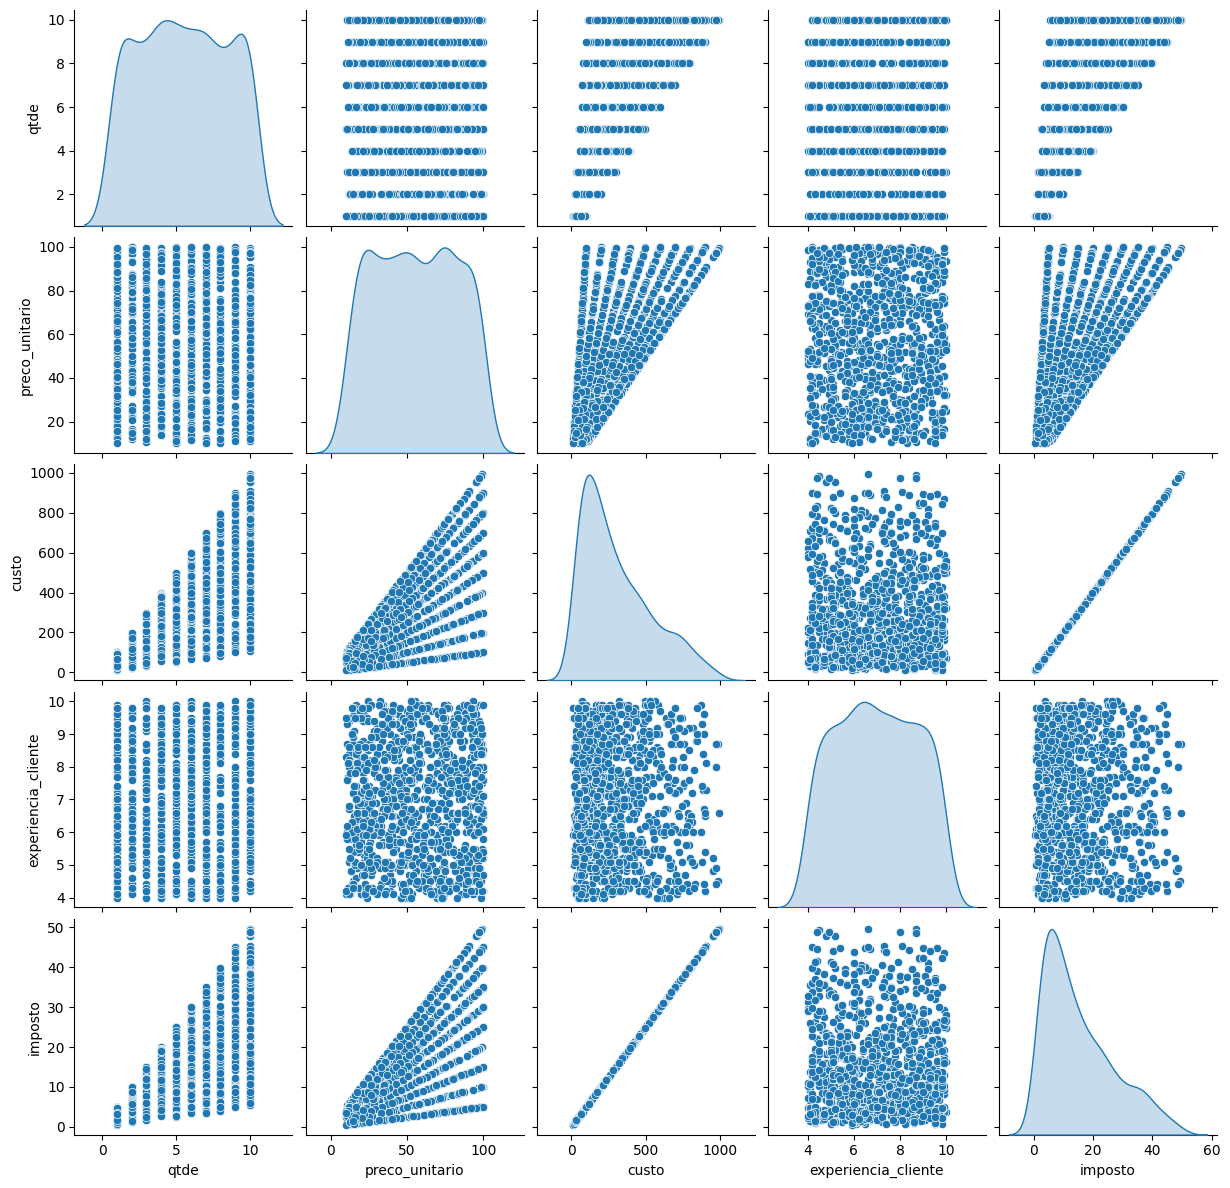

In [494]:
# verificando se os dados tem distribuição normal
p= sns.pairplot(dfx[['qtde','preco_unitario','custo','experiencia_cliente','imposto']], \
                diag_kind="kde");
p.fig.subplots_adjust(top=0.95)

<Axes: >

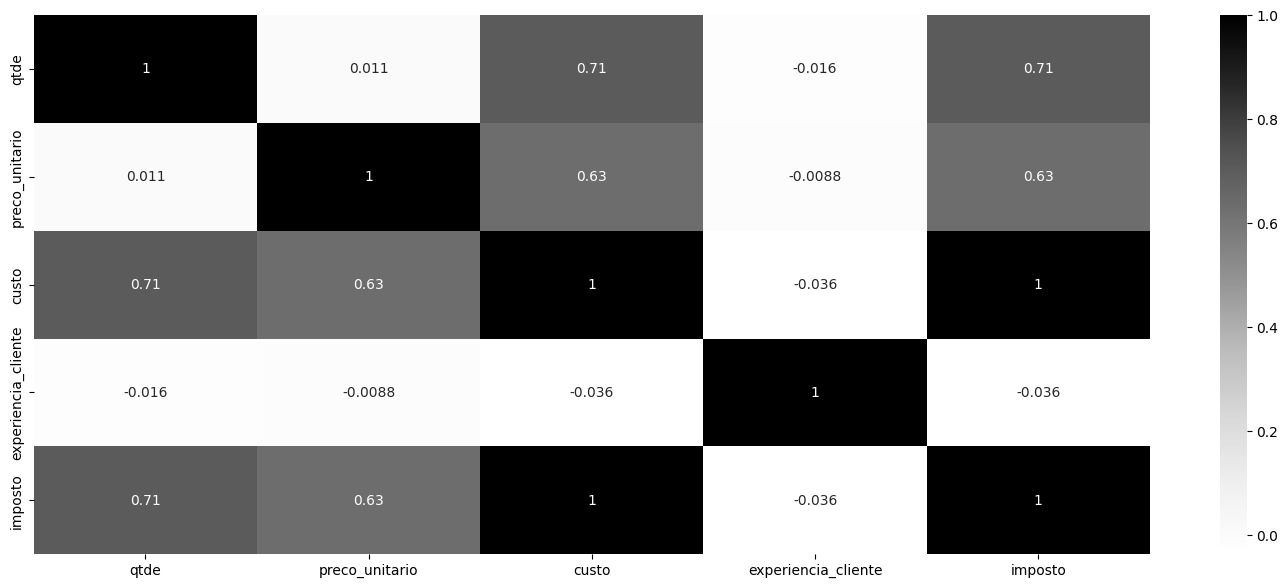

In [495]:
# correlação entre os valores
# custo e imposto apresenta uma melhor correlação com a quantidade vendida
fig,ax = plt.subplots(figsize=(18,7))

sns.heatmap(dfx[['qtde','preco_unitario','custo','experiencia_cliente','imposto']].\
            corr(numeric_only=True), annot=True, cmap="Grays")

In [496]:
# salva os dados tratados em arquivo csv
dfx.sort_values(by=["data_hora"]).to_csv('arquivos_tratados/df_supermarket_sales.csv', index=False)